<a href="https://colab.research.google.com/github/hanwool88/github/blob/master/proto6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# from google.colab import drive
# drive.mount('/gdrive', force_remount=True)

In [ ]:
from PIL import Image
import os, glob, sys
!pip install numpy==1.16.1
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import np_utils

img_dir = './position'
categories = ['good', 'bad']
nb_classes = len(categories)

image_w = 64
image_h = 64


pixel = image_h * image_w * 3

X = []
y = []

for idx, cat in enumerate(categories):
    
    img_dir_detail = img_dir + "/" + cat
    files = glob.glob(img_dir_detail+"/*.jpg")


    for i, f in enumerate(files):
        try:
            img = Image.open(f)
            img = img.convert("RGB")
            img = img.resize((image_w, image_h))
            data = np.asarray(img)
            #Y는 0 아니면 1이니까 idx값으로 넣는다.
            X.append(data)
            y.append(idx)
            if i % 300 == 0:
                print(cat, " : ", f)
        except:
            print(cat, str(i)+" 번째에서 에러 ")
X = np.array(X)
Y = np.array(y)


x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1)

y_train = y_train.reshape((y_train.shape[0], 1))
y_test = y_test.reshape((y_test.shape[0], 1))

np.save('dataset/x_train_color.npy', x_train)
np.save('dataset/x_test_color.npy', x_test)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

good  :  ./position/good/good41.jpg
bad  :  ./position/bad/bad20.jpg
(200, 64, 64, 3) (200, 1)
(23, 64, 64, 3) (23, 1)


/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


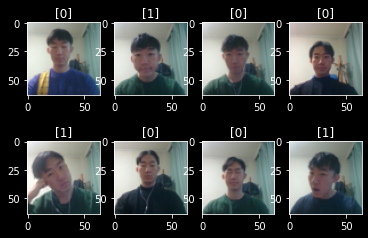

In [ ]:
plt.subplot(2, 4, 1)
plt.title(y_train[0])
plt.imshow(x_train[0])
plt.subplot(2, 4, 2)
plt.title(y_train[1])
plt.imshow(x_train[1])
plt.subplot(2, 4, 3)
plt.title(y_train[2])
plt.imshow(x_train[2])
plt.subplot(2, 4, 4)
plt.title(y_train[3])
plt.imshow(x_train[3])

plt.subplot(2, 4, 5)
plt.title(y_train[4])
plt.imshow(x_train[4])
plt.subplot(2, 4, 6)
plt.title(y_train[5])
plt.imshow(x_train[5])
plt.subplot(2, 4, 7)
plt.title(y_train[6])
plt.imshow(x_train[6])
plt.subplot(2, 4, 8)
plt.title(y_train[7])
plt.imshow(x_train[7])

In [ ]:
x_result = []
for x in x_train:
    img = cv2.cvtColor(x, cv2.COLOR_RGB2GRAY)
    x_result.append(img)

x_result = np.array(x_result)
np.save('dataset/x_train.npy', x_result)

x_result = []
for x in x_test:
    img = cv2.cvtColor(x, cv2.COLOR_RGB2GRAY)
    x_result.append(img)

x_result = np.array(x_result)
np.save('dataset/x_test.npy', x_result)

np.save('dataset/y_train.npy', y_train)
np.save('dataset/y_test.npy', y_test)

In [ ]:
x_result = []
for x in x_train:
    img = cv2.cvtColor(x, cv2.COLOR_RGB2GRAY)
    x_result.append(img)

x_result = np.array(x_result)
np.save('dataset/x_train.npy', x_result)

x_result = []
for x in x_test:
    img = cv2.cvtColor(x, cv2.COLOR_RGB2GRAY)
    x_result.append(img)

x_result = np.array(x_result)
np.save('dataset/x_test.npy', x_result)

np.save('dataset/y_train.npy', y_train)
np.save('dataset/y_test.npy', y_test)

In [ ]:
import numpy as np
import os, h5py
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, Dense, Input, MaxPooling2D, Activation, LeakyReLU, Flatten, Dropout
from keras.models import Model, Sequential, load_model
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

(200, 64, 64) (200, 1)
(23, 64, 64) (23, 1)


/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


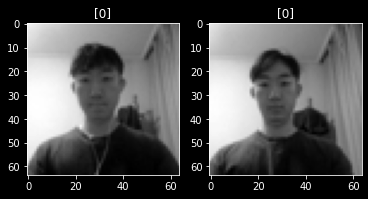

In [ ]:
base_path = 'dataset'

x_train = np.load(os.path.join(base_path, 'x_train.npy'))
y_train = np.load(os.path.join(base_path, 'y_train.npy'))
x_test = np.load(os.path.join(base_path, 'x_test.npy'))
y_test = np.load(os.path.join(base_path, 'y_test.npy'))

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

plt.subplot(1, 2, 1)
plt.title(y_train[0])
plt.imshow(x_train[0], cmap='gray')
plt.subplot(1, 2, 2)
plt.title(y_train[10])
plt.imshow(x_train[10], cmap='gray')

In [ ]:
x_train = x_train.reshape((-1, 64, 64, 1))
x_test = x_test.reshape((-1, 64, 64, 1))
print(x_train.shape)

train_datagen = ImageDataGenerator(
    samplewise_center=True,
    samplewise_std_normalization=True,
    brightness_range=[0.5, 1.5],
    zoom_range=[0.8, 1.1],
    rotation_range=15.,
    channel_shift_range=25,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(
    samplewise_center=True,
    samplewise_std_normalization=True,
)

train_batch_gen = train_datagen.flow(x_train, y_train, batch_size=5, shuffle=True)
test_batch_gen = test_datagen.flow(x_test, y_test, batch_size=5, shuffle=False)


(200, 64, 64, 1)


In [ ]:
inputs = Input(shape=(64, 64, 1))

net = Conv2D(filters=64, kernel_size=3, strides=2, padding='same')(inputs)
net = LeakyReLU()(net)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Dropout(0.25)(net)
    
net = Conv2D(128, (3, 3), padding="same", activation='relu')(net)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Dropout(0.25)(net)

    
net = Conv2D(256, (3, 3), padding="same", activation='relu')(net)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Dropout(0.25)(net)
    

net = Flatten()(net)

net = Dense(units=256)(net)
net = Activation('relu')(net)

net = Dense(units=1)(net)
outputs = Activation('sigmoid')(net)

model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 64, 64, 1)]       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 64)        640       
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 8, 8, 128)         0   

In [ ]:
model.fit_generator(
    train_batch_gen,
    epochs=20,
    validation_data=test_batch_gen,
    callbacks=[
        ModelCheckpoint('models/pose.h5', monitor='val_acc', save_best_only=True, mode='max', verbose=1),
        ReduceLROnPlateau(monitor='val_acc', factor=0.2, patience=5, verbose=1, mode='auto', min_lr=1e-05)
    ]
)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
40/40 [==============================] - 3s 59ms/step - loss: 0.7802 - acc: 0.4899 - val_loss: 0.7607 - val_acc: 0.4783

Epoch 00001: val_acc improved from -inf to 0.47826, saving model to models/pose.h5
Epoch 2/20
40/40 [==============================] - 2s 54ms/step - loss: 0.7435 - acc: 0.5449 - val_loss: 0.6429 - val_acc: 0.8261

Epoch 00002: val_acc improved from 0.47826 to 0.82609, saving model to models/pose.h5
Epoch 3/20
40/40 [==============================] - 2s 54ms/step - loss: 0.6140 - acc: 0.7665 - val_loss: 0.3069 - val_acc: 0.9565

Epoch 00003: val_acc improved from 0.82609 to 0.95652, saving model to models/pose.h5
Epoch 4/20
40/40 [==============================] - 2s 55ms/step - loss: 0.3886 - acc: 0.8736 - val_loss: 0.1988 - val_acc: 0.9565

Epoch 00004: val_acc did not improve from 0.95652
Epoch 5/20
40/40 [==============================] - 2s 54ms/step - loss: 0.3093 - acc: 0.8823 - val_loss: 0.1168 - val_acc: 0.9565

Epoch 00005: val_acc did not improv

In [ ]:
# import tensorflow as tf
# model.save('/gdrive/My Drive/model/pose.h5')

# # new_model = tf.keras.models.load_model('/gdrive/My Drive/model/pose.h5')

# # # 모델 구조를 확인합니다
# # new_model.summary()

In [ ]:
x_test_input = x_test.copy().astype(np.float64)
x_test_input -= np.mean(x_test, keepdims=True)
x_test_input /= (np.std(x_test, keepdims=True) + 1e-6)

y_pred = model.predict(x_test_input)

y_pred_logical = (y_pred > 0.8).astype(np.int)

test acc: 0.9565217391304348


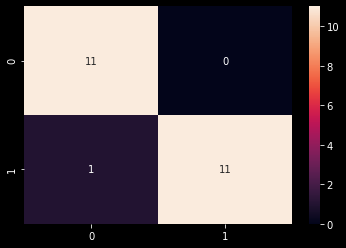

In [ ]:
print ('test acc: %s' % accuracy_score(y_test, y_pred_logical))
cm = confusion_matrix(y_test, y_pred_logical)
sns.heatmap(cm, annot=True)